In [95]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

DATA_DIR = '/home/jeff/Downloads/data/camera-model/'

train_df = pd.read_csv(os.path.join(DATA_DIR, 'features.csv'), header=None)
y = train_df.iloc[:, 0].as_matrix()
X = train_df.drop(0, axis=1).as_matrix()

le = LabelEncoder()
Y = le.fit_transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [96]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier

estimator = BaggingClassifier()
classifier = OneVsRestClassifier(estimator)

classifier.fit(X_train, Y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
          n_jobs=1)

In [90]:
from sklearn.metrics import accuracy_score

preds = classifier.predict(X_test)
accuracy_score(preds, Y_test)


0.71878787878787875

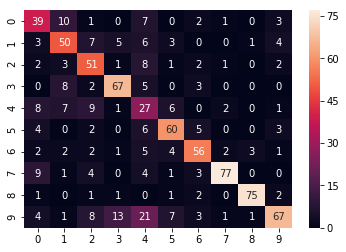

In [61]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
import seaborn as sn

mtx = confusion_matrix(preds, Y_test)
sn.heatmap(mtx, annot=True)

In [59]:
classes = le.classes_.tolist()
per_class = [entries[i]/sum(entries) for i,entries in enumerate(mtx)]
for i in range(len(classes)):
    print('{}: {}'.format(classes[i], per_class[i]))

HTC-1-M7: 0.6190476190476191
LG-Nexus-5x: 0.6329113924050633
Motorola-Droid-Maxx: 0.7183098591549296
Motorola-Nexus-6: 0.788235294117647
Motorola-X: 0.4426229508196721
Samsung-Galaxy-Note3: 0.75
Samsung-Galaxy-S4: 0.717948717948718
Sony-NEX-7: 0.7777777777777778
iPhone-4s: 0.9036144578313253
iPhone-6: 0.5317460317460317


In [91]:
DATA_DIR = '/home/jeff/Downloads/data/camera-model/'

test_df = pd.read_csv(os.path.join(DATA_DIR, 'test_features.csv'), header=None)
filenames = test_df.iloc[:, 0].as_matrix()
X_test = test_df.drop(0, axis=1).as_matrix()

In [94]:
preds = classifier.predict(X_test)
preds = le.inverse_transform(preds)
with open(os.path.join(DATA_DIR, 'results.csv'), 'w') as pred_file:
    pred_file.write('fname,camera\n')
    for i in range(len(preds)):
        pred_file.write('{},{}\n'.format(filenames[i], preds[i]))

array(['HTC-1-M7', 'LG-Nexus-5x', 'Motorola-Droid-Maxx',
       'Motorola-Nexus-6', 'Motorola-X', 'Samsung-Galaxy-Note3',
       'Samsung-Galaxy-S4', 'Sony-NEX-7', 'iPhone-4s', 'iPhone-6'], dtype=object)